# KMeans without Scaling

In [1]:
import pandas as pd
df2=pd.read_csv("Iris.csv")
print(df2.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3)
samples=df2.iloc[:,1:5]
print(samples.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


In [4]:
model.fit(samples)
labels=model.predict(samples)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [7]:
df3=pd.DataFrame({'labels':labels,'species':df2['Species']})
ct=pd.crosstab(df3['labels'], df3['species'])
print(ct)
print(df3.head())

species  Iris-setosa  Iris-versicolor  Iris-virginica
labels                                               
0                  0                2              36
1                 50                0               0
2                  0               48              14
   labels      species
0       1  Iris-setosa
1       1  Iris-setosa
2       1  Iris-setosa
3       1  Iris-setosa
4       1  Iris-setosa


In [8]:
print(model.inertia_)

78.9408414261


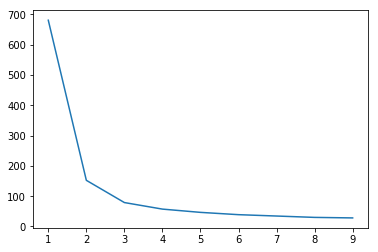

In [9]:
import numpy as np
import matplotlib.pyplot as plt
x=[]
y=[]
for n in np.arange(1,10):
    model=KMeans(n_clusters=n)
    model.fit(samples)
    x.append(n)
    y.append(model.inertia_)
    
plt.plot(x, y)
plt.show()

# KMeans with Scaling

In [14]:
#Importing Iris Dataset
import pandas as pd
df=pd.read_csv("Iris.csv")
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [15]:
#Scaling and then Deploying KMeans Clustering model
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scaler= StandardScaler()
model=KMeans(n_clusters=3)
pipeline=make_pipeline(scaler, model)
samples=df.iloc[:,1:5]
print(samples.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


In [16]:
pipeline.fit(samples)
labels=pipeline.predict(samples)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 0 2 2
 0 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [44]:
#Cross - Tabulation of clustered models
df1=pd.DataFrame({'labels':labels,'species':df['Species']})
ct=pd.crosstab(df1['labels'], df1['species'])
print(ct)
print(df1.head())

species  Iris-setosa  Iris-versicolor  Iris-virginica
labels                                               
0                  0               38              14
1                 50                0               0
2                  0               12              36
   labels      species
0       1  Iris-setosa
1       1  Iris-setosa
2       1  Iris-setosa
3       1  Iris-setosa
4       1  Iris-setosa


In [47]:
#checking inertia metric of cluster when n_cluster=3
print(model.inertia_)

140.968378955


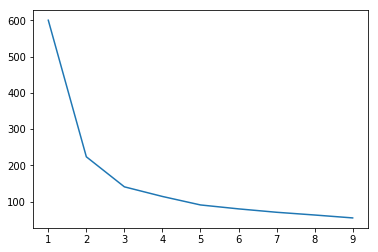

In [48]:
#Checking inertia metric of dataset while varying no of clusters from 1 to 10
import numpy as np
import matplotlib.pyplot as plt
x=[]
y=[]
for n in np.arange(1,10):
    model=KMeans(n_clusters=n)
    pipeline=make_pipeline(scaler, model)
    pipeline.fit(samples)
    x.append(n)
    y.append(model.inertia_)
    
plt.plot(x, y)
plt.show()

# TSNE, Pearson correlation & PCA

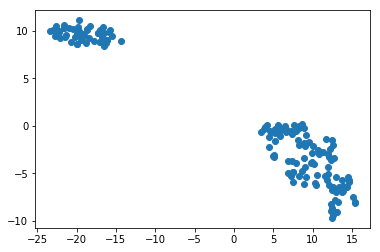

In [49]:
#Visualising transformed model with TSNE
from sklearn.manifold import TSNE
model=TSNE(learning_rate=100)
pipeline=make_pipeline(scaler, model)
transformed=pipeline.fit_transform(samples)
xs=transformed[:,0]
ys=transformed[:,1]
plt.scatter(xs, ys)
plt.show()

In [34]:
#Checking pearson correlation between length and width
from scipy.stats import pearsonr
sepal_length=samples.iloc[:,0]
sepal_width=samples.iloc[:,1]
petal_length=samples.iloc[:,2]
petal_width=samples.iloc[:,3]
correlation, pvalue= pearsonr(sepal_length, sepal_width)
correlation1, pvalue1= pearsonr(petal_length, petal_width)

In [35]:
print(correlation)
print(correlation1)

-0.109369249951
0.962757097051


In [38]:
#Dimension reduction with PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(samples)
transformed= pca.transform(samples)
print(transformed.shape)

(150, 2)


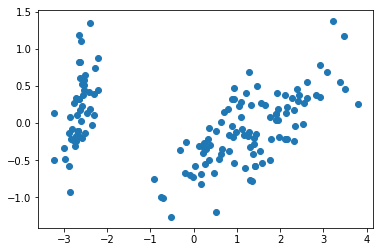

In [39]:
#Plotting iris dataset in 2 dimensions
xs= transformed[:,0]
ys= transformed[:,1]
plt.scatter(xs, ys)
plt.show()